In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn import metrics
# pip install graphviz
# conda install python-graphviz

In [2]:
matplotlib.rcParams.update({'font.size': 18,
                           'lines.linewidth' : 3,
                           'figure.figsize' : [15, 5],
                           'lines.markersize': 10})
pd.options.mode.chained_assignment = None


# Load our data

In [3]:
df_titanic = pd.read_csv('./00_data/titanic.csv')

In [4]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Some quick data exploration

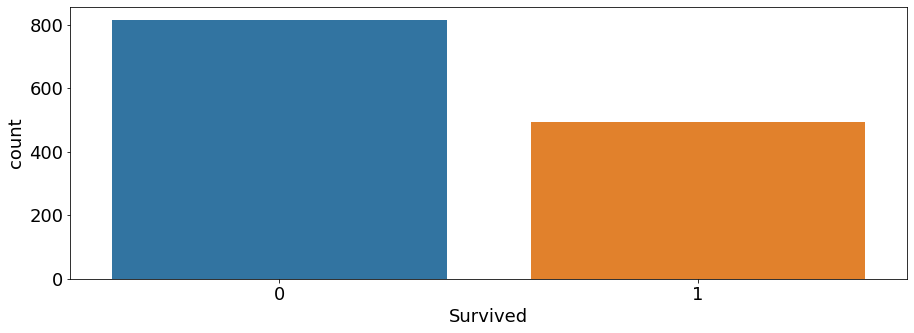

In [5]:
sns.countplot('Survived',data=df_titanic);

It is evident that not many passengers survived the accident.

Out of 891 passengers in training set, only around 350 survived i.e Only 38.4% of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.

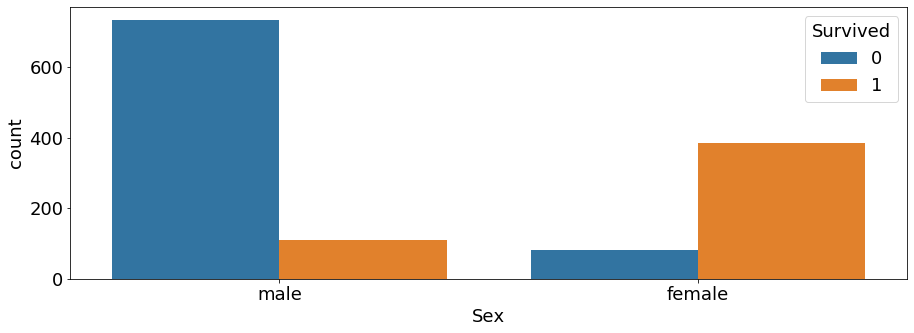

In [7]:
sns.countplot('Sex',hue='Survived',data=df_titanic);

The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved. The survival rates for a **women on the ship is around 75% while that for men in around 18-19%.**

I guess the saying **woman and children first** did apply in the Titanic and it was a Hollywood stunt.

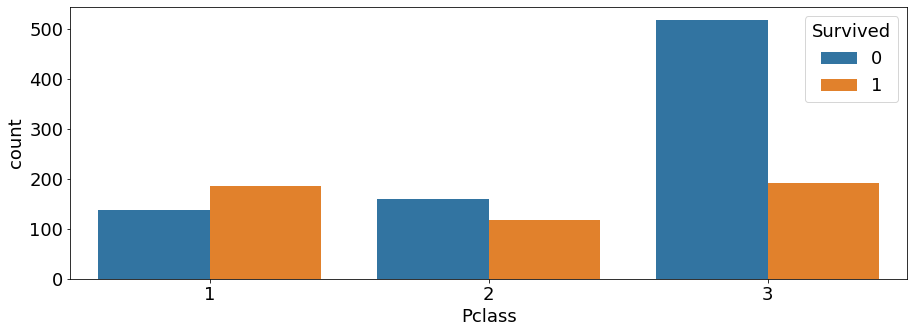

In [8]:
sns.countplot('Pclass',hue='Survived',data=df_titanic);

People say **Money Can't Buy Everything**. But we can clearly see that Passenegers Of Pclass 1 were given a very high priority while rescue. Even though the the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around **25%**.

For Pclass 1 %survived is around **63%** while for Pclass2 is around **48%**. So money and status matters.

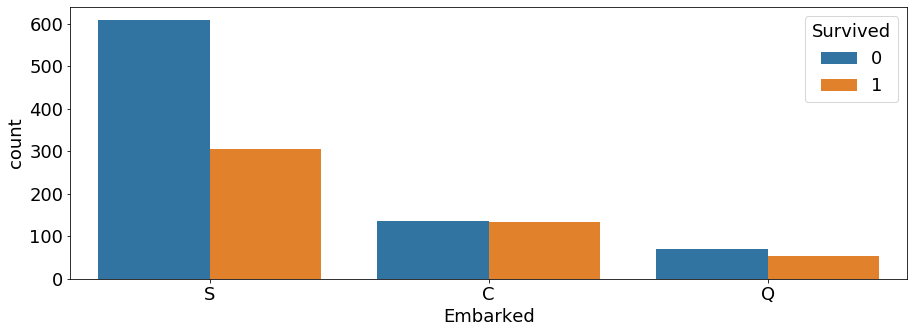

In [9]:
sns.countplot('Embarked',hue='Survived',data=df_titanic);

Oh! So people who embarked from C (Cherbourg) and Q (Queenstown) where more likely to survive then those that boarded from S (Southampton).

# Pre-Processing


## Inputing missing data
Looking at our Titanic dataset, the feature for **cabin** clearly indicates that we have `NaN` values. We need to handle these and any other null columns.

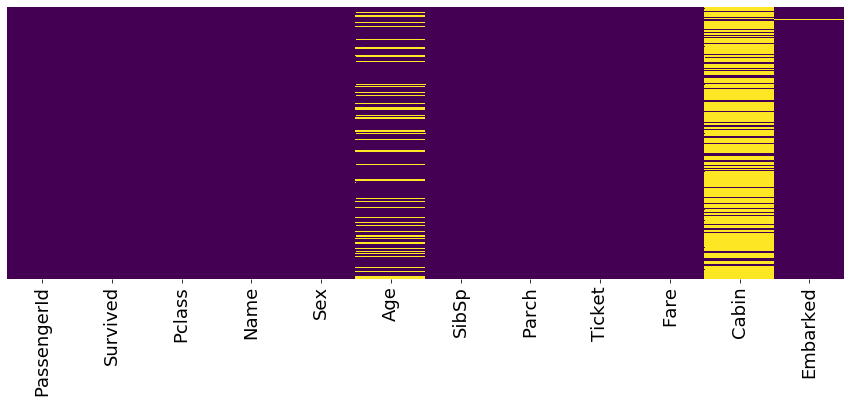

In [10]:
sns.heatmap(df_titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [11]:
def missingValues(data):
    total = data.isnull().sum().sort_values(ascending=False) # getting the sum of null values and ordering
    percent = (data.isnull().sum() / data.isnull().count() * 100).sort_values(ascending=False)  #getting the percent and order of null
    dt = pd.concat([total, percent], axis=1,keys=['Total','Percent'])  # Concatenating the total and percent
    return dt
missingValues(df_titanic)

,Total,Percent
Cabin,1014,77.463713
Age,263,20.091673
Embarked,2,0.152788
Fare,1,0.076394
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


So we have 3 types of missing information:
- **cabin** has 77% missing....not sure what information it can give us
- **age** we can maybe fill in the most common.....
- **embarked** & **fare**
    - we could delete and not loose too much info...only 0.15% and 0.07%
    - we could inpute with the most common embarkation port or mean_fare

In [11]:
# drop cabin


['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']


In [12]:
# inpute mean age - 29.69 seems about right
np.mean(df_titanic['Age'])

29.881137667304014

In [ ]:
df_titanic['Age'].head(8)

In [15]:
df_titanic['Age'].head(8)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    30.0
6    54.0
7     2.0
Name: Age, dtype: float64

In [16]:
# mean fare
df_titanic['Fare'][ df_titanic['Fare'].isnull()] = round(np.mean(df_titanic['Fare']))

In [17]:
# inpute most common embarkation port
from collections import Counter
Counter(df_titanic['Embarked'])

Counter({'S': 914, 'C': 270, 'Q': 123, nan: 2})

In [19]:
Counter(df_titanic['Embarked'])

Counter({'S': 916, 'C': 270, 'Q': 123})

In [20]:
missingValues(df_titanic)

,Total,Percent
Embarked,0,0.0
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Age,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0
Survived,0,0.0


## Data types
**Categorical Features:**
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them. For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.

Categorical Features in the dataset: **Sex, Embarked**.

**Ordinal Features:**
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For example: If we have a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. Here we can have a relative sort in the variable.

Ordinal Features in the dataset: **PClass**


**Continous Feature:**
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

Continous Features in the dataset: **Age, Fare**

In [21]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Categorical Variables
### Sex - Binary

In [22]:
Counter(df_titanic['Sex'])

Counter({'male': 843, 'female': 466})

In [24]:
## use preprocessing LabelEncoder

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",1,30.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,C


### Embarked - Categorical

In [25]:
Counter(df_titanic['Embarked'])

Counter({'S': 916, 'C': 270, 'Q': 123})

In [26]:
## use preprpcessing OneHotEncoder



In [27]:
ohe_fitted.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [28]:
df_embarked = pd.DataFrame(ohe_fitted.transform(df_titanic[['Embarked']]),
                           columns= [ 'Embarked_{}'.format(ii) for ii in ohe_fitted.categories_[0].tolist()]
                          )
df_embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [29]:
df_titanic = pd.concat([ df_titanic.drop(['Embarked'], axis=1), df_embarked], axis=1)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0.0,0.0,1.0


## Ordinal Data
What about **pclass** ?

## Continous Data

Sometimes our observations will be very unevenly distributed for a given feature. For example, *ticket* is roughly exponentially distributed. In cases like these it can be useful to transform the values of our features or our target to better highlight trends or to allow for use of models that might not otherwise be applicable.

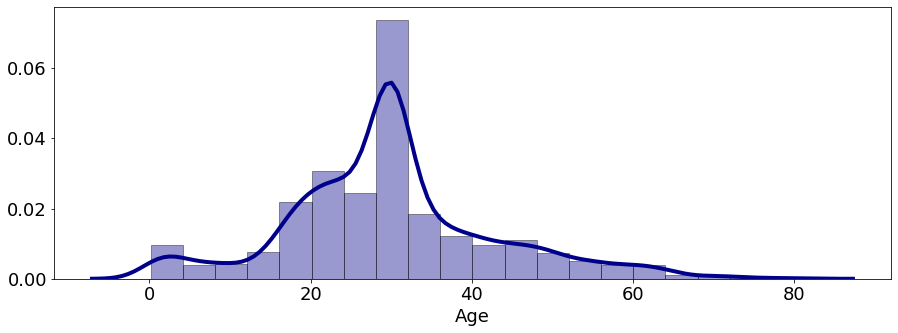

In [30]:
def plotDist(data):
    sns.distplot(data, hist=True, kde=True, bins=20, color = 'darkblue', 
                 hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4});
plotDist(df_titanic['Age'])

In [31]:
## use sklearn.preprocessing StandardScaler

ss = StandardScaler()
ss_transformed = ss.fit_transform(df_titanic[['Age']])
ss_transformed[:10]

array([[-0.61382191],
       [ 0.62857237],
       [-0.30322334],
       [ 0.39562345],
       [ 0.39562345],
       [ 0.00737523],
       [ 1.87096665],
       [-2.16681476],
       [-0.22557369],
       [-1.23501905]])

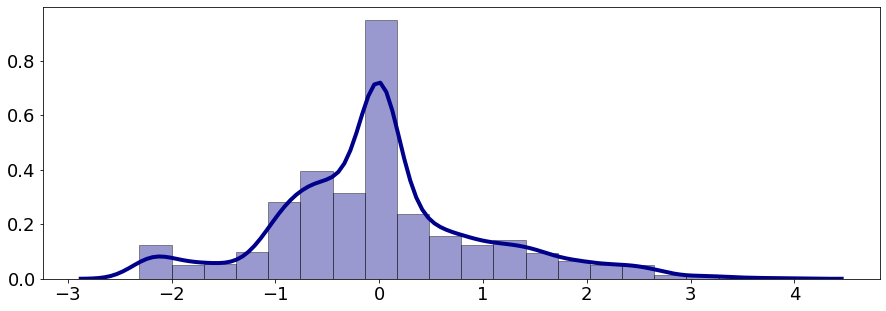

In [32]:
plotDist(ss_transformed)

In [33]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0.0,0.0,1.0


In [34]:
df_titanic['Age']= ss_transformed

In [35]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.613822,1,0,A/5 21171,7.2500,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.628572,1,0,PC 17599,71.2833,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.303223,0,0,STON/O2. 3101282,7.9250,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.395623,1,0,113803,53.1000,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",1,0.395623,0,0,373450,8.0500,0.0,0.0,1.0


## MinMaxScaler
Another technique used to scale data is [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler)
- scaling each feature to a given range
- *sensitive to outliers*

Formal definition for MinMaxScaler is given by: $$ x'_i = \frac{x_i-x_{min}}{x_{max} - x_{min}}$$

**In a Nutshell:**

**You probably won't go wrong if you use `StandardScaler` to scale your features.**

## Ready up for modelling

In [36]:
df_target = df_titanic['Survived']
# drop unwanted/redundant columns
df_titanic.drop(['PassengerId', 'Survived','Name','Ticket'], axis=1, inplace=True)
df_titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,-0.613822,1,0,7.2500,0.0,0.0,1.0
1,1,0,0.628572,1,0,71.2833,1.0,0.0,0.0
2,3,0,-0.303223,0,0,7.9250,0.0,0.0,1.0
3,1,0,0.395623,1,0,53.1000,0.0,0.0,1.0
4,3,1,0.395623,0,0,8.0500,0.0,0.0,1.0


In [37]:
X = np.array(df_titanic)
X

array([[ 3.        ,  1.        , -0.61382191, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        ,  0.        ,  0.62857237, ...,  1.        ,
         0.        ,  0.        ],
       [ 3.        ,  0.        , -0.30322334, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 3.        ,  1.        ,  0.66739719, ...,  0.        ,
         0.        ,  1.        ],
       [ 3.        ,  1.        ,  0.00737523, ...,  0.        ,
         0.        ,  1.        ],
       [ 3.        ,  1.        ,  0.00737523, ...,  1.        ,
         0.        ,  0.        ]])

In [38]:
y = df_target
y[:20]

0     0
1     1
2     1
3     1
4     0
5     0
6     0
7     0
8     1
9     1
10    1
11    1
12    0
13    0
14    0
15    1
16    0
17    1
18    0
19    1
Name: Survived, dtype: int64

In [46]:
# save for later user
df_titanic.to_csv('./00_data/titanic_X.csv',index=False)
y.to_csv('./00_data/titanic_y.csv', header=False, index=False)

# Create a train-test split

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [37]:
print('X_train : {}'.format(X_train.shape))
print('y_train : {}'.format(y_train.shape))
print('X_test : {}'.format(X_test.shape))
print('y_test : {}'.format(y_test.shape))

X_train : (1047, 9)
y_train : (1047,)
X_test : (262, 9)
y_test : (262,)


# Intro to our first model - Decision Trees
- both classification or regression.
- also outlier detection. 

The trained models resemble a tree, complete with branches and nodes. 

The model is essentially a series of questions with yes or no answers,
- resulting tree structure contains all the combination of responses.

Tree based models are popular:
- mimic human decision making process, 
- work well for a large class of problems, 
- naturally handle multiclassification, and 
- handle a mix of categorical and numerical data. 
- easy to understand and explain : good explainability

## Training decision tree classifiers
The best way to understand a decision tree is to construct one and visualize it. We'll train a decision tree classifier on the iris data set and visualize the tree with the Graphviz package. The iris data set is a famous data set of 150 observations of three different iris species: setosa, versicolor, and virginica. Each observation has measurements of the petal length and width and sepal length and width, for a total of four features.

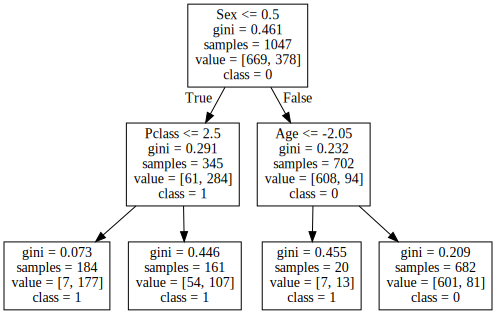

In [38]:
import graphviz
from sklearn.tree import export_graphviz

## use DecisionTreeClassifier of depth 2. fit(X_train, y_train)

# train decision tree
tree


# visual tree
graphviz.Source(export_graphviz(tree, 
                                out_file=None,
                                feature_names=np.array(df_titanic.columns.tolist()),
                                class_names=np.array(['0','1'])))

Note how the model resembles an upside down tree and each box represents a node in the tree. Printed in each box is

* **samples**: the number of observations in the node.
* **Gini**: a measure of node purity.
* **value**: the distribution of observations in each class.
* **class**: the most common label in the node.

At the top of the tree is the __root node__. This node is _split_ to form two branches. Observations that satisfy the criterion printed at the top of the box are moved to one branch while the rest to the other. You can view a decision tree as a model that is making partitions in a space that contains your training data. The partitions are chosen to separate the different classes. For the tree displayed above, node splits were chosen to lead to an overall reduction of the Gini metric, discussed further in the next section. The nodes that do not branch off are called __terminal nodes__ or __leaves__.

With a trained tree, predictions are made on an observation by starting at the root and following the path as a result of the criterion in each node. Once at a leaf, the predicted class is the class with the plurality. For example, if an observation has **sex** of 0 (<=0.5) and **pclass** of 0,1,2, it will reside in the left most leaf in the figure. 

Our trained tree model only makes splits using three features, **sex**, **pclass** and **age** making it easy to visualize our model.

### Gini impurity
- node impurity
- probability of misclassifying an observation if it were randomly labeled

DT will node split that result in reducing the Gini metric. The equation for the Gini impurity for node $m$ is

$$ G_m = \sum_k p_{mk} (1 - p_{mk}), $$

where $p_{mk}$ is the fraction of observations of class $k$ in node $m$. 

Consider two cases where a node has 10 observations belonging to two classes:
* Case 1: [5, 5]
$$ G = \frac{5}{10} \left(1 - \frac{5}{10}\right) + \frac{5}{10} \left(1 - \frac{5}{10}\right) = 0.5 $$
* Case 2: [10, 0]
$$ G = \frac{10}{10} \left(1 - \frac{10}{10}\right) + \frac{0}{10} \left(1 - \frac{0}{10}\right) = 0 $$

The greater the node purity, the lower the Gini metric. See the plot below of how Gini varies with $p_{mk}$ when there are two classes.

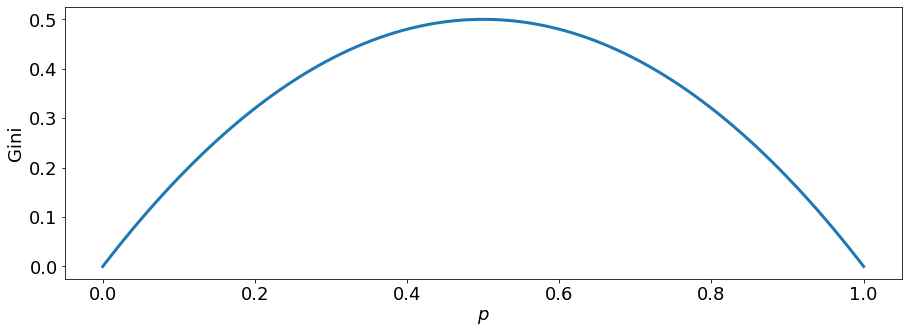

In [12]:
p = np.linspace(1E-6, 1-1E-6, 100)
gini = p*(1-p) + (1-p)*p

plt.plot(p, gini)
plt.xlabel('$p$')
plt.ylabel('Gini');

### Entropy

In chemistry, entropy is a measure of the amount of disorder in your system. 

The equation for entropy of node $m$ is

$$ H_m = -\sum_{k} p_{mk} \log_2(p_{mk}).$$

Using the same two cases as before when calculating the Gini metric, the entropy is equal to

* Case 1: [5, 5]
$$ H = -\left[\frac{5}{10} \log_2 \left(\frac{5}{10}\right) + \frac{5}{10} \log_2 \left(\frac{5}{10}\right)\right] = 1  $$
* Case 2: [10, 0]
$$ H = -\left[\frac{10}{10} \log_2 \left(\frac{10}{10}\right) + \frac{0}{10} \log_2 \left(\frac{0}{10}\right)\right] = 0 $$

Similar to the Gini impurity, a more pure node will have lower entropy. Since entropy and Gini impurity are very similar metrics, using either will not make any substantial difference in your classifier. 

By default, the `DecisionTreeClassifier` class uses the Gini metric but can be switched to entropy by setting `criterion='entropy'`.

## Decision Tree Hyperparameters

| Decision Tree Hyperparameters | Description |
|:---:|---|
|max_depth| The maximum depth of the tree |
|max_features|The number of features to consider when deciding the best split|
|min_samples_split|Minimum number of samples to consider a split on an internal node|
|min_samples_leaf|Minimum number of samples required for a leaf (terminal node)|

- `scikit-learn` documentation or notebook documentation

## Putting it all together

In [40]:
## import DecisionTreeClassifier
## define max_depth 3, max_features=2, min_split=10, min_leaf=20
## dtc_fitted, dtc_pred, dtc_pred_proba




In [41]:
dtc_pred

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

In [42]:
dtc_pred_proba

array([[0.24242424, 0.75757576],
       [0.24242424, 0.75757576],
       [0.94339623, 0.05660377],
       [0.94339623, 0.05660377],
       [0.42105263, 0.57894737],
       [0.85472155, 0.14527845],
       [0.85472155, 0.14527845],
       [0.94339623, 0.05660377],
       [0.24242424, 0.75757576],
       [0.24242424, 0.75757576],
       [0.94339623, 0.05660377],
       [0.94339623, 0.05660377],
       [0.24242424, 0.75757576],
       [0.85472155, 0.14527845],
       [0.24242424, 0.75757576],
       [0.42105263, 0.57894737],
       [0.24242424, 0.75757576],
       [0.42105263, 0.57894737],
       [0.24242424, 0.75757576],
       [0.24242424, 0.75757576],
       [0.85472155, 0.14527845],
       [0.24242424, 0.75757576],
       [0.32786885, 0.67213115],
       [0.85472155, 0.14527845],
       [0.16666667, 0.83333333],
       [0.24242424, 0.75757576],
       [0.16666667, 0.83333333],
       [0.24242424, 0.75757576],
       [0.42105263, 0.57894737],
       [0.94339623, 0.05660377],
       [0.

In [43]:
print('Accuracy : {}'.format(metrics.accuracy_score(y_true=y_test, y_pred=dtc_pred)))
print('Precision : {}'.format(metrics.precision_score(y_test, dtc_pred)))
print('Recall : {}'.format(metrics.recall_score(y_test, dtc_pred)))
print('F1-score : {}'.format(metrics.f1_score(y_test, dtc_pred)))
print("Classification Report:")
print(metrics.classification_report(y_test, dtc_pred))
precision, recall, threshold = metrics.precision_recall_curve(y_test, dtc_pred_proba[:,1])
print("Precision-Recall AUC: {}".format(metrics.auc(recall, precision)))
print("Receiver-Operator AUC: {}".format(metrics.roc_auc_score(y_test, dtc_pred_proba[:,1])))

Accuracy : 0.8091603053435115
Precision : 0.7291666666666666
Recall : 0.9051724137931034
F1-score : 0.8076923076923076
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81       146
           1       0.73      0.91      0.81       116

    accuracy                           0.81       262
   macro avg       0.82      0.82      0.81       262
weighted avg       0.83      0.81      0.81       262

Precision-Recall AUC: 0.7252986774814107
Receiver-Operator AUC: 0.8423181388757675


# Save and export your fitted model

In [44]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(dtc_fitted, open(filename, 'wb'))